In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
tf.config.experimental.list_physical_devices() # cuda GPUs

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
tf.test.is_built_with_cuda() # need Cuda GPU 

False

In [4]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 218s 1us/step


In [5]:
X_train.shape # (number of images , width,length,RGB)

(50000, 32, 32, 3)

In [6]:
X_train[0] # first image

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
y_train.shape # classes

(50000, 1)

In [9]:
y_train[0:5] # first 5 images classes

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])

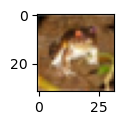

In [12]:
plot_sample(0) 

In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

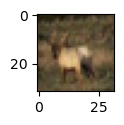

In [14]:
plot_sample(3)

In [15]:
y_train[3]

array([4], dtype=uint8)

In [23]:
y_train[3][0]

4

In [19]:
classes[y_train[3][0]]

'deer'

# Scaling

In [33]:
X_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [26]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [34]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [36]:
# One hot encoding , Dummies
y_train_categorical = keras.utils.to_categorical(
    y_train,num_classes=10
)

In [37]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [38]:
y_test_categorical = keras.utils.to_categorical(
    y_test,num_classes=10
)

# Model Building

In [41]:
X_train_scaled.shape # we want to flatten it 

(50000, 32, 32, 3)

In [42]:
32*32*3 # will flatten to 3072 array inputs

3072

In [43]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [48]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'), # hidden layer , relu is best with hidden layer
    keras.layers.Dense(10,activation='sigmoid') # output layer , sigmoid is best with classifcation
])

model.compile(optimizer='SGD',
             loss='categorical_crossentropy', # one-hot-encoded use categorical , if discrete number then add parse
             metrics=['accuracy'])

model.fit(X_train_scaled,y_train_categorical,epochs=5) # ofc we need more epochs , butttttttttttt time

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.2987 - loss: 1.9518
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 35ms/step - accuracy: 0.4137 - loss: 1.6724
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 32ms/step - accuracy: 0.4482 - loss: 1.5873
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.4656 - loss: 1.5283
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.4844 - loss: 1.4809


In [49]:
classes[np.argmax(model.predict(X_test_scaled)[0])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


'cat'

In [50]:
classes[y_test[0][0]] # cat is 3

'cat'

In [51]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4706 - loss: 1.5149


[1.520483374595642, 0.4690999984741211]

In [52]:
# Exercise 

# https://www.tensorflow.org/tutorials/keras/classification   do it on fashion mnist dataset

In [13]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

In [3]:
(X_train, y_train), (X_test, y_test) =  keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 357s 14us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 5s 1us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

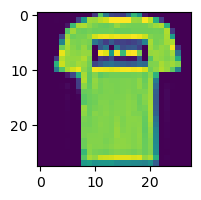

In [8]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1])

In [17]:
y_train[1]

0

In [18]:
X_train = X_train / 255
X_test = X_test / 255

In [19]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [29]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=30,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(units=100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [30]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 30)          │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5070)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │         507,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 508,410 (1.94 MB)

 Trainable params: 508,410 (1.94 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.4838 - loss: 1.4788
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7551 - loss: 0.6561
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.7886 - loss: 0.5760
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8141 - loss: 0.5129
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8285 - loss: 0.4734


In [32]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8284 - loss: 0.4736


[0.4787524938583374, 0.82669997215271]

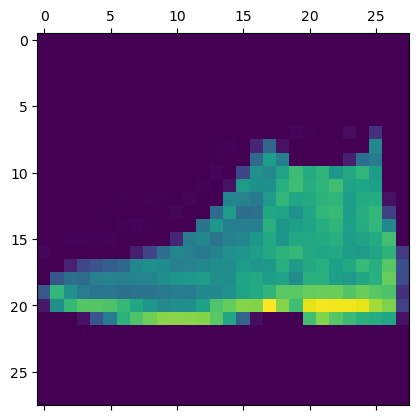

In [33]:
plt.matshow(X_test[0])


In [35]:
yp = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [36]:
yp[0] # becuase of softmax

array([1.6806670e-09, 3.2646576e-11, 1.2602902e-08, 1.7731121e-08,
       3.4910818e-07, 3.5368200e-02, 8.3651834e-08, 3.2417855e-01,
       6.1162893e-04, 6.3984114e-01], dtype=float32)

In [37]:
np.argmax(yp[0])

9

In [38]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [39]:
class_labels[np.argmax(yp[0])]

'Ankle boot'

In [40]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=30,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(units=100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5)

model.evaluate(X_test,y_test)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.5078 - loss: 1.4422
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7697 - loss: 0.6176
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8014 - loss: 0.5408
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8190 - loss: 0.5023
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8344 - loss: 0.4636
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8342 - loss: 0.4655


[0.4721735417842865, 0.829200029373169]